# Distribution Plots In Python

## Simulate the ecommerce data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot  as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Original data
model_id = np.arange(1, 51)
model_name = ['Phone ' + str(i) for i in model_id]
screen_size = np.random.uniform(4.5, 7.0, 50)  # Generate 50 random screen sizes

data = {
    'ModelID': model_id,
    'ModelName': model_name,
    'ScreenSize': screen_size,
}

df = pd.DataFrame(data)
df.head(5)

,ModelID,ModelName,ScreenSize
0,1,Phone 1,5.436350
1,2,Phone 2,6.876786
2,3,Phone 3,6.329985
3,4,Phone 4,5.996646
4,5,Phone 5,4.890047


In [2]:
# Define linear relationship between screen size and sales
df['Sales'] = df['ScreenSize'] * 3 + 10

# Add normally-distributed noise to sales data
noise = np.random.normal(scale=0.5, size=len(df))
df['Sales'] += noise

# Round sales data to two decimal places
df['Sales'] = df['Sales'].round(2)

# Calculate summary statistics
summary_stats = {
    'Mean': df['ScreenSize'].mean(),
    'Median': df['ScreenSize'].median(),
    'Standard Deviation': df['ScreenSize'].std(),
    'Maximum': df['ScreenSize'].max(),
    'Minimum': df['ScreenSize'].min(),
}

summary_df = pd.DataFrame(summary_stats, index=[0])
summary_df

,Mean,Median,Standard Deviation,Maximum,Minimum
0,5.61481,5.590122,0.722208,6.924775,4.551461


# Histogram

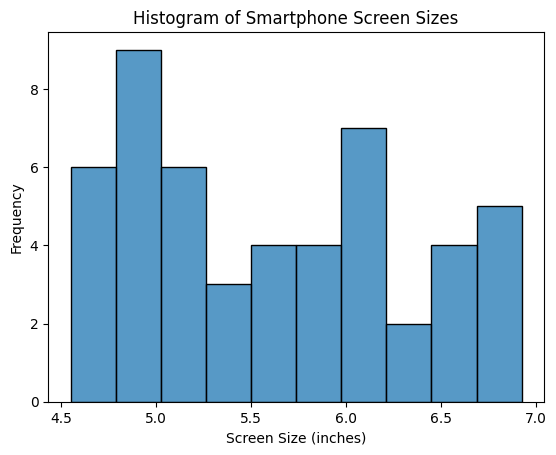

In [3]:
sns.histplot(df['ScreenSize'], kde=False, bins=10)
plt.title('Histogram of Smartphone Screen Sizes')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Frequency')
plt.show()

### Choosing the number of Bins

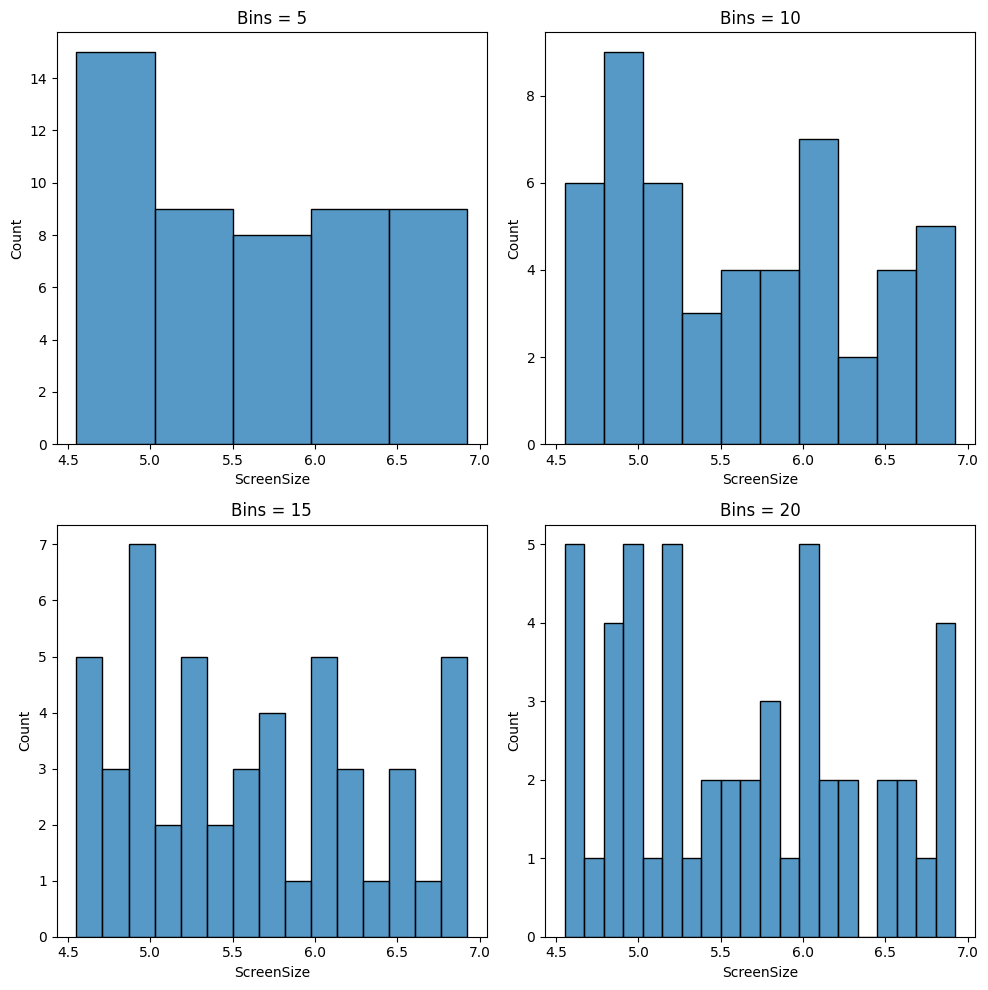

In [4]:
# Different number of bins

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Histogram with 5 bins
sns.histplot(df['ScreenSize'], bins=5, kde=False, ax=axs[0, 0])
axs[0, 0].set_title('Bins = 5')

# Histogram with 10 bins
sns.histplot(df['ScreenSize'], bins=10, kde=False, ax=axs[0, 1])
axs[0, 1].set_title('Bins = 10')

# Histogram with 15 bins
sns.histplot(df['ScreenSize'], bins=15, kde=False, ax=axs[1, 0])
axs[1, 0].set_title('Bins = 15')

# Histogram with 20 bins
sns.histplot(df['ScreenSize'], bins=20, kde=False, ax=axs[1, 1])
axs[1, 1].set_title('Bins = 20')

plt.tight_layout()
plt.show()


### Mathematically choosing bins

Square-Root Choice:
$ \text{bins} = \sqrt{n} $
​

Sturges' Formula:
$ \text{bins} = \log_2{n} + 1$


Rice's Rule:
$ \text{bins} = 2 \cdot \sqrt[3]{\frac{n}{3}} $




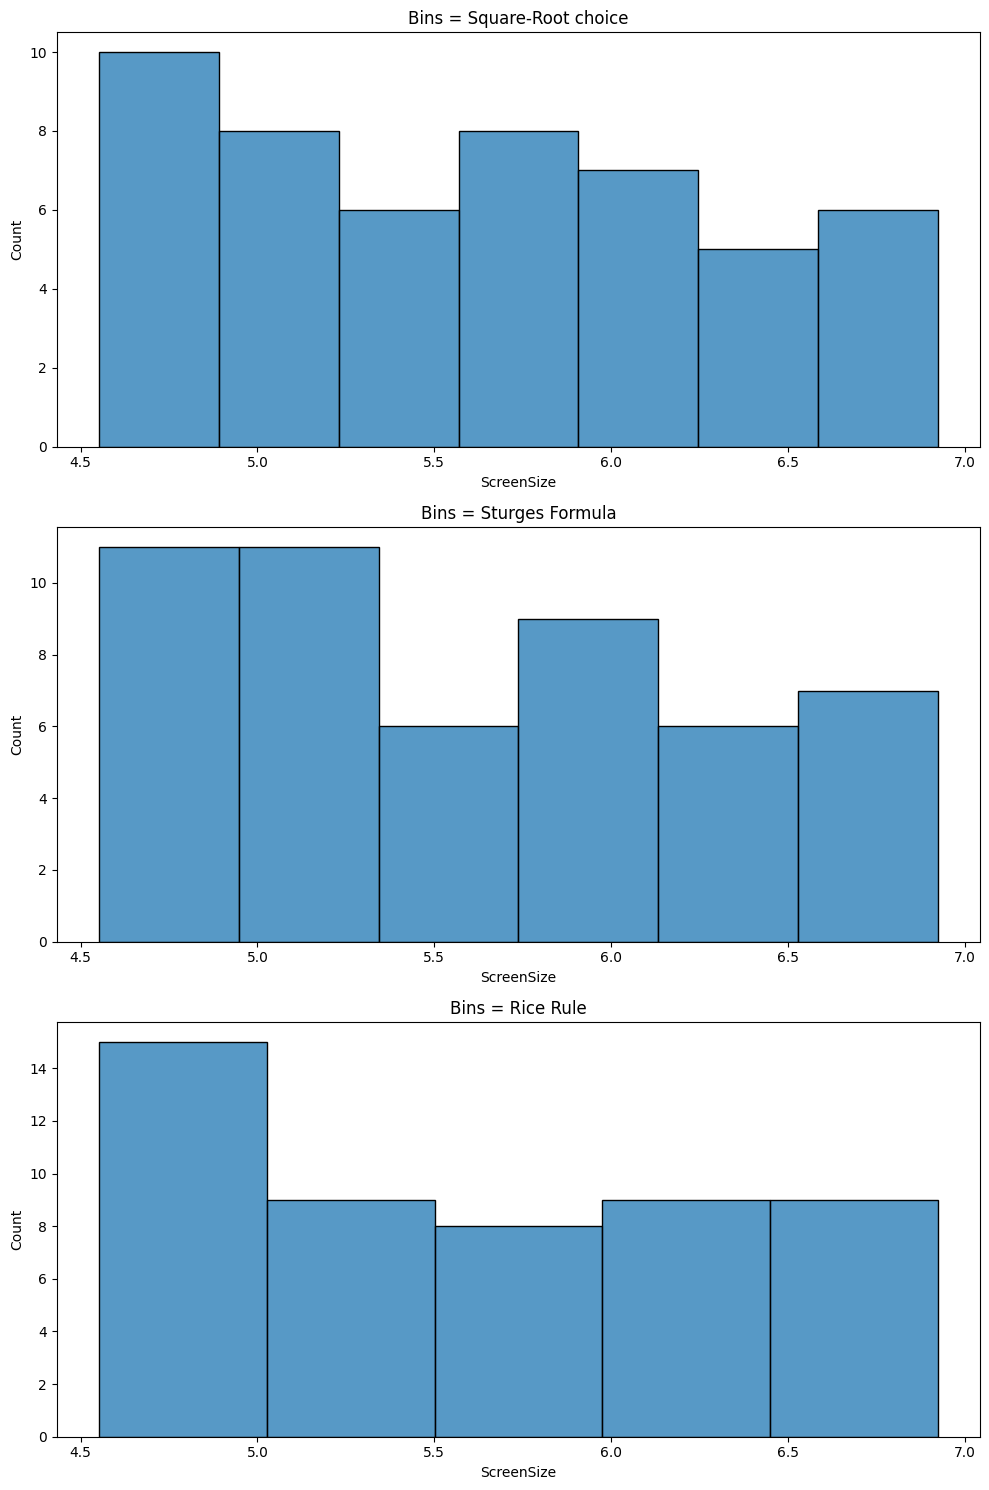

In [5]:
# Number of data points
n = df['ScreenSize'].count()

# Calculate the number of bins
bins_sqrt = int(np.sqrt(n))
bins_sturges = int(np.log2(n) + 1)
bins_rice = int(2 * (n / 3) ** (1/3))

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Histogram with Square-Root choice bins
sns.histplot(df['ScreenSize'], bins=bins_sqrt, kde=False, ax=axs[0])
axs[0].set_title('Bins = Square-Root choice')

# Histogram with Sturges' formula bins
sns.histplot(df['ScreenSize'], bins=bins_sturges, kde=False, ax=axs[1])
axs[1].set_title('Bins = Sturges Formula')

# Histogram with Rice Rule bins
sns.histplot(df['ScreenSize'], bins=bins_rice, kde=False, ax=axs[2])
axs[2].set_title('Bins = Rice Rule')

plt.tight_layout()
plt.show()


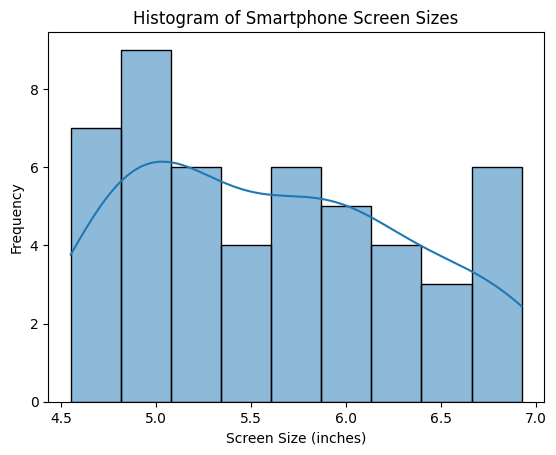

In [6]:
# Thinking about the lables
sns.histplot(df['ScreenSize'], kde=True, binwidth=0.25)
plt.title('Histogram of Smartphone Screen Sizes')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Frequency')
plt.show()

## Kernel Density Estimation

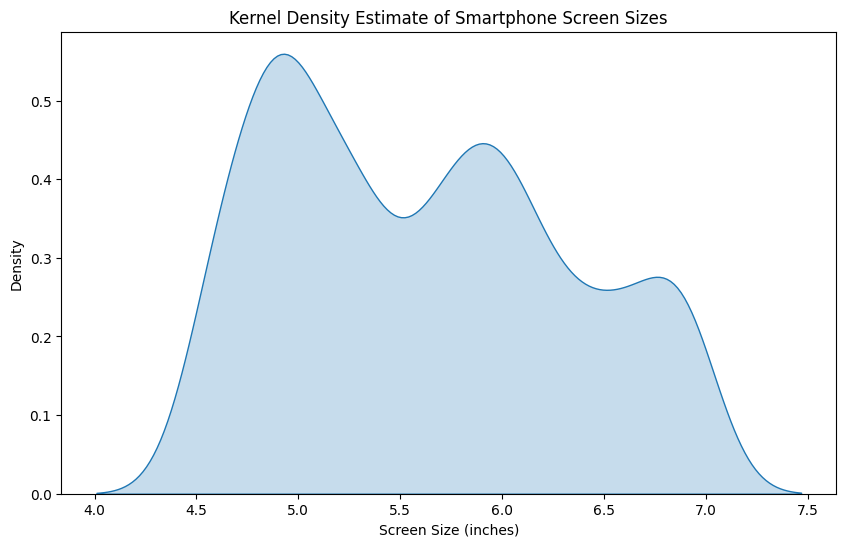

In [7]:
# Kernal Density Estimate
plt.figure(figsize=(10, 6))
sns.kdeplot(df['ScreenSize'], fill=True, bw_method=0.25)
plt.title('Kernel Density Estimate of Smartphone Screen Sizes')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Density')
plt.show()


## Cumulative Distribution Function

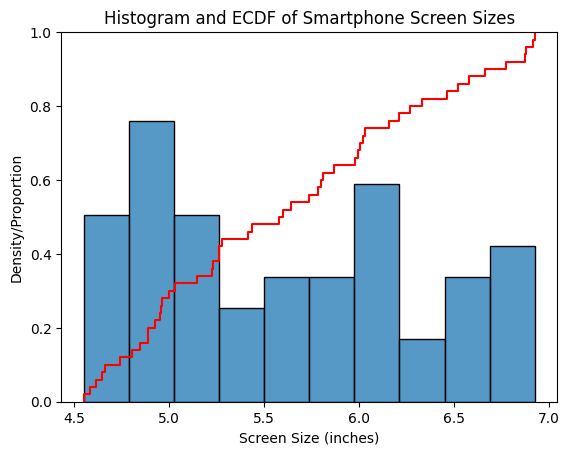

In [8]:
# Create the histogram
sns.histplot(df['ScreenSize'], kde=False, stat="density", bins=10)

# Overlay the ECDF plot
sns.ecdfplot(df['ScreenSize'], color='red')

plt.title('Histogram and ECDF of Smartphone Screen Sizes')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Density/Proportion')
plt.show()


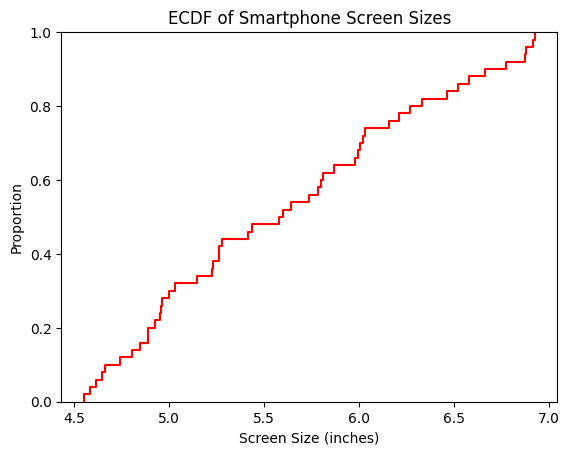

In [9]:
sns.ecdfplot(df['ScreenSize'], color='red')

plt.title('ECDF of Smartphone Screen Sizes')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Proportion')
plt.show()

# Bar Plots

## Load The Data

In [11]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [12]:
## Count the number of each cylinders and gear combination

counts = mtcars.groupby(['cyl', 'gear']).size().reset_index(name='count')

counts

,cyl,gear,count
0,4,3,1
1,4,4,8
2,4,5,2
3,6,3,2
4,6,4,4
5,6,5,1
6,8,3,12
7,8,5,2


## Stacked Bar Plot

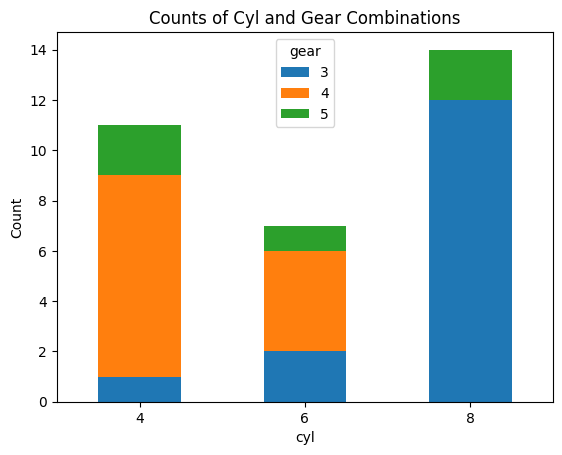

In [13]:
## Stacked barplot

pivoted_counts = counts.pivot(index='cyl', columns='gear', values='count')

pivoted_counts.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)

plt.ylabel('Count')
plt.title('Counts of Cyl and Gear Combinations')
plt.show()

### Y Ordered, Count

From Largest to Lowest Counts

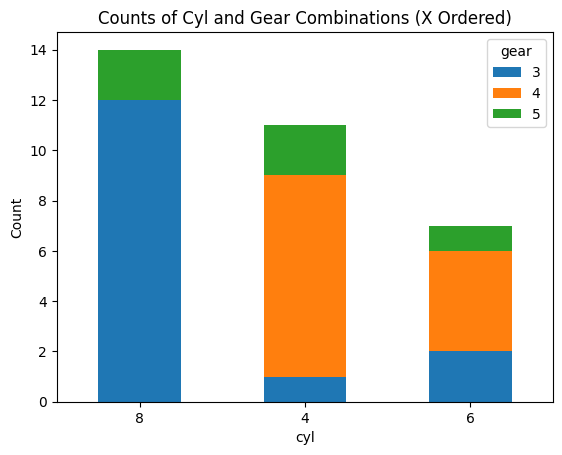

In [14]:
# Sort the DataFrame by the sum of counts in descending order
sorted_pivoted_counts = pivoted_counts.loc[pivoted_counts.sum(axis=1).sort_values(ascending=False).index]

# Create a stacked bar plot
sorted_pivoted_counts.plot(kind='bar', stacked=True)

# Rotating X-axis labels
plt.xticks(rotation = 0)

# Set labels and title
plt.xlabel('cyl')
plt.ylabel('Count')
plt.title('Counts of Cyl and Gear Combinations (X Ordered)')

# Show the plot
plt.show()

### X ordered, Percentage:

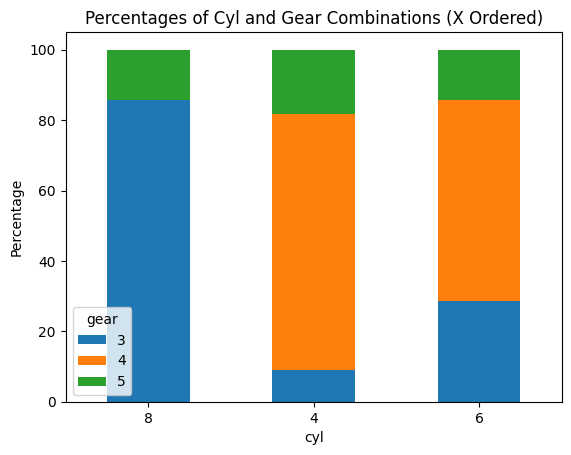

In [15]:
# Calculate the percentage of each gear within each cyl
percentages = pivoted_counts.div(pivoted_counts.sum(axis=1), axis=0) * 100

# Sort the DataFrame by the sum of counts in descending order
sorted_percentages = percentages.loc[pivoted_counts.sum(axis=1).sort_values(ascending=False).index]

# Create a stacked bar plot
sorted_percentages.plot(kind='bar', stacked=True)

# Rotating X-axis labels
plt.xticks(rotation = 0)

# Set labels and title
plt.xlabel('cyl')
plt.ylabel('Percentage')
plt.title('Percentages of Cyl and Gear Combinations (X Ordered)')

# Show the plot
plt.show()

# Pie Charts

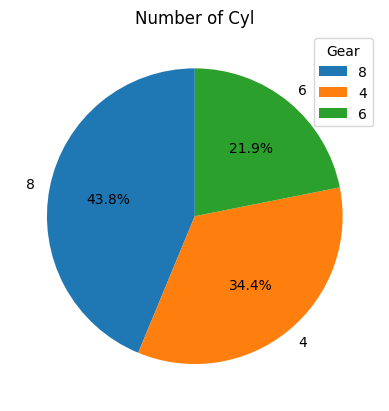

In [16]:
# Get the counts of each cyl
cyl_counts = mtcars['cyl'].value_counts()

# Create a pie chart (Automatic Percetaging)
plt.pie(cyl_counts, labels=cyl_counts.index, autopct='%1.1f%%', startangle=90)

# Set title
plt.title('Number of Cyl')

# Add legend
plt.legend(title='Gear', loc='upper right')


# Show the plot
plt.show()

## Pie charts number of each cylinders and gear combination

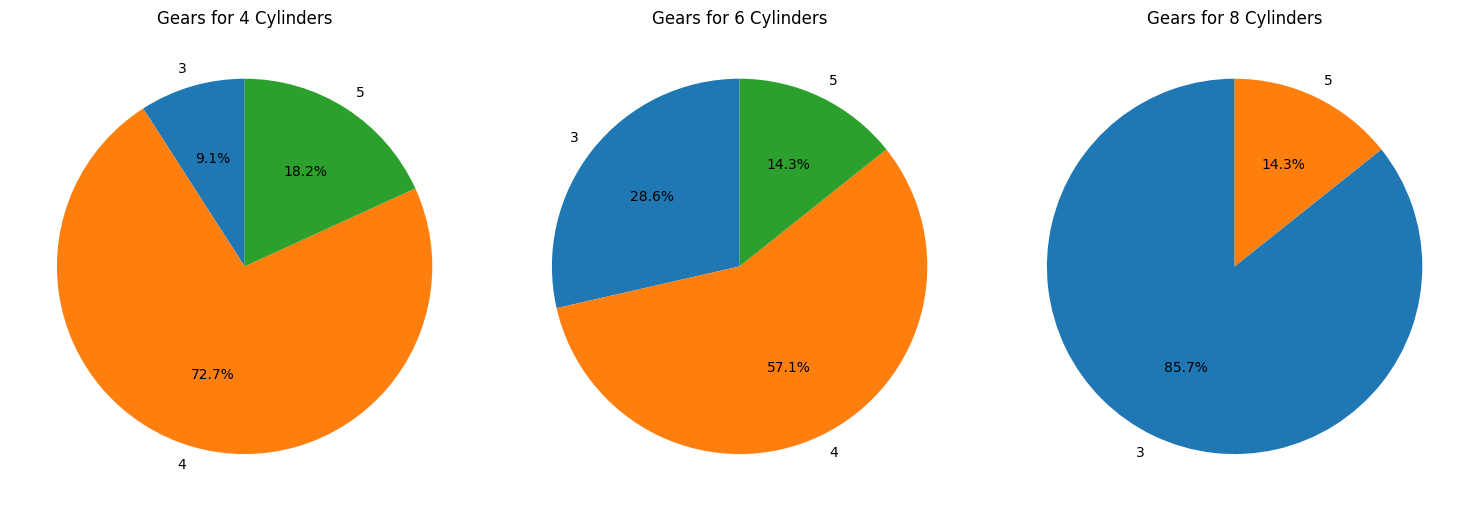

In [17]:
# Get unique cylinder categories
cyl_categories = counts['cyl'].unique()

# Determine the number of rows and columns for the subplot grid
num_rows = 1
num_cols = len(cyl_categories)

# Create a figure and subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5))

# Iterate over each cylinder category
for i, cyl_category in enumerate(cyl_categories):
    # Filter the counts DataFrame for the current cylinder category
    filtered_counts = counts[counts['cyl'] == cyl_category]

    # Get the gear counts for the current cylinder category
    gear_counts = filtered_counts['count']

    # Get the gear labels
    gear_labels = filtered_counts['gear']

    # Create a pie chart for the current cylinder category
    axes[i].pie(gear_counts, labels=gear_labels, autopct='%1.1f%%', startangle=90)

    # Set title
    axes[i].set_title(f'Gears for {cyl_category} Cylinders')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Comparing: Pie Chart, Donut Chart, Double Donut Chart, Exploding Donus Chart

C:\Users\smkamran\AppData\Local\Temp\ipykernel_15444\3525232935.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  combinations = counts[['cyl', 'gear']].apply(lambda x: f'{x[0]} Cyl - {x[1]} Gear', axis=1)


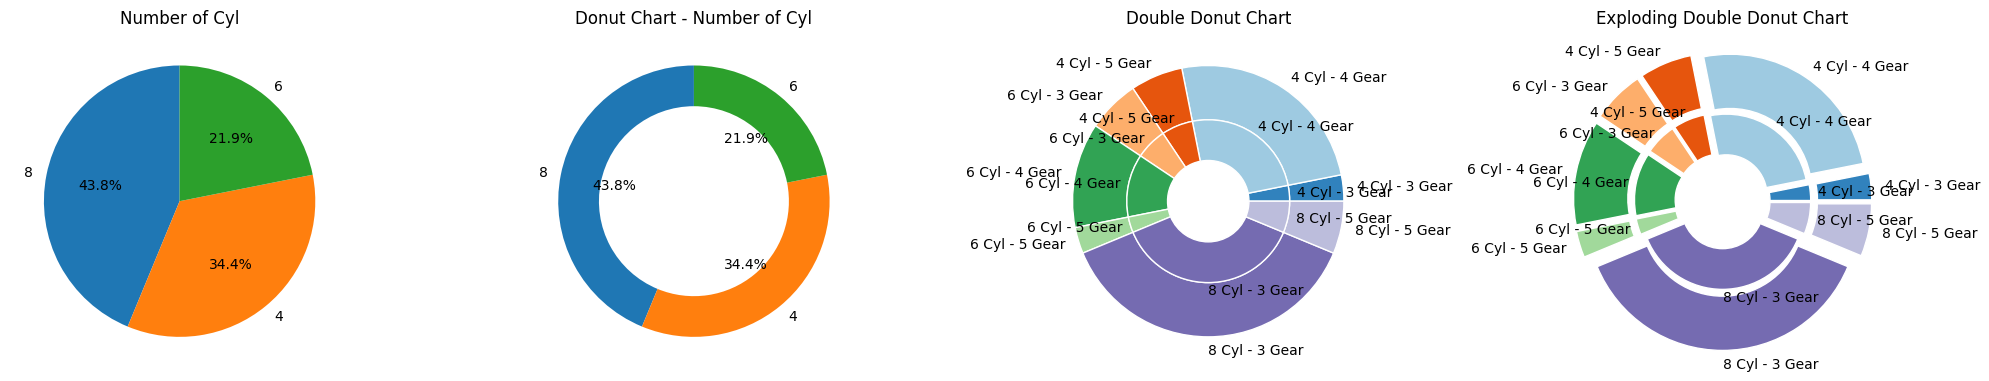

In [18]:
# Group by 'cyl' and 'gear' columns and calculate the counts
counts = mtcars.groupby(['cyl', 'gear']).size().reset_index(name='count')

# Get unique cylinder and gear combinations
combinations = counts[['cyl', 'gear']].apply(lambda x: f'{x[0]} Cyl - {x[1]} Gear', axis=1)
comb_counts = counts['count']

# Create a figure and axes
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Pie chart - Number of cyl
axes[0].pie(cyl_counts, labels=cyl_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Number of Cyl')

# Donut chart
axes[1].pie(cyl_counts, labels=cyl_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
axes[1].set_title('Donut Chart - Number of Cyl')
axes[1].add_artist(plt.Circle((0, 0), 0.6, fc='white'))

# Double Donut chart
cm = plt.get_cmap("tab20c")
colors = cm(np.arange(len(combinations)) * 2)
outer_width = 0.4
inner_width = 0.3

outer_pie, _ = axes[2].pie(comb_counts, radius=1, labels=combinations, colors=colors, wedgeprops=dict(width=outer_width, edgecolor='white'))
inner_pie, _ = axes[2].pie(comb_counts, radius=1 - outer_width, labels=combinations, colors=colors, wedgeprops=dict(width=inner_width, edgecolor='white'))

axes[2].set_title('Double Donut Chart')

# Exploding Double Donut chart
explode_outer = [0.1] * len(comb_counts)
explode_inner = [0.05] * len(comb_counts)

outer_pie, _ = axes[3].pie(comb_counts, radius=1, labels=combinations, colors=colors, wedgeprops=dict(width=outer_width, edgecolor='white'), explode=explode_outer)
inner_pie, _ = axes[3].pie(comb_counts, radius=1 - outer_width, labels=combinations, colors=colors, wedgeprops=dict(width=inner_width, edgecolor='white'), explode=explode_inner)

axes[3].set_title('Exploding Double Donut Chart')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()